<a href="https://colab.research.google.com/github/adnanfathoni88/Big-Data/blob/main/ALS_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Adnan Fathoni <br>
Kelas: IF08 <br>
NIM: 24.21.1591

# Alternated Least Squares

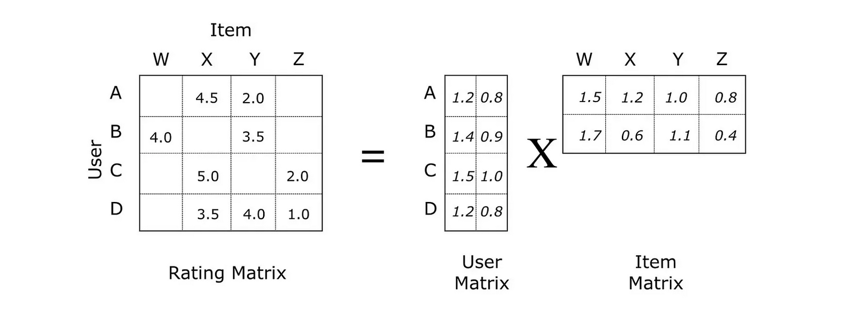

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sc.version

'3.5.3'

In [ ]:
from pyspark.mllib.recommendation import Rating
from pyspark.mllib.recommendation import ALS

In [ ]:
# Load the data into RDD
data = sc.textFile('ml_ratings.txt')

In [ ]:
data.take(5)

['0::2::3::1424380312',
 '0::3::1::1424380312',
 '0::5::2::1424380312',
 '0::9::4::1424380312',
 '0::11::1::1424380312']

In [ ]:
# Split the RDD
ratings = data.map(lambda l: l.split('::'))

In [ ]:
ratings.take(5)

[['0', '2', '3', '1424380312'],
 ['0', '3', '1', '1424380312'],
 ['0', '5', '2', '1424380312'],
 ['0', '9', '4', '1424380312'],
 ['0', '11', '1', '1424380312']]

In [ ]:
# Transform the ratings RDD
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2], seed=42)

In [ ]:
ratings_final.take(5)

[Rating(user=0, product=2, rating=3.0),
 Rating(user=0, product=3, rating=1.0),
 Rating(user=0, product=5, rating=2.0),
 Rating(user=0, product=9, rating=4.0),
 Rating(user=0, product=11, rating=1.0)]

In [ ]:
training_data.take(5)

[Rating(user=0, product=2, rating=3.0),
 Rating(user=0, product=3, rating=1.0),
 Rating(user=0, product=5, rating=2.0),
 Rating(user=0, product=9, rating=4.0),
 Rating(user=0, product=11, rating=1.0)]

In [ ]:
# test data
test_data.take(5)

[Rating(user=0, product=21, rating=1.0),
 Rating(user=0, product=26, rating=3.0),
 Rating(user=0, product=30, rating=1.0),
 Rating(user=0, product=41, rating=2.0),
 Rating(user=0, product=45, rating=2.0)]

In [ ]:
# Create the ALS model on the training data
model = ALS.train(training_data, rank=5, iterations=5)

# Drop the ratings column
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model
predictions = model.predictAll(testdata_no_rating)

In [ ]:
# Return the first 5 rows of the RDD
predictions.take(5)

[Rating(user=22, product=96, rating=3.8074921775096824),
 Rating(user=24, product=96, rating=2.0419604099893753),
 Rating(user=12, product=96, rating=-0.09983031561479372),
 Rating(user=26, product=96, rating=0.10145310559321707),
 Rating(user=26, product=52, rating=-2.631587040866183)]

In [ ]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.10


In [ ]:
from pyspark import SparkContext
from pyspark.mllib.recommendation import ALS, Rating
from pyspark.mllib.evaluation import RegressionMetrics

# Split the data into training and test
print("Jumlah data training:", training_data.count())
print("Jumlah data test:", test_data.count())

# model ALS
rank = 5
iterations = 10
lambda_ = 0.1
model = ALS.train(training_data, rank=rank, iterations=iterations, lambda_=lambda_)

# Test data tanpa kolom rating
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Prediksi rating untuk data test
predictions = model.predictAll(testdata_no_rating)

# Gabungkan prediksi dengan data test untuk evaluasi
predictions_and_ratings = predictions.map(lambda r: ((r[0], r[1]), r[2])) \
                                     .join(test_data.map(lambda r: ((r[0], r[1]), r[2]))) \
                                     .map(lambda r: r[1])

# Hitung Mean Squared Error (MSE)
metrics = RegressionMetrics(predictions_and_ratings)
MSE_NEW = metrics.meanSquaredError

# bandingkan mse new dan mse old
print("MSE New:", MSE_NEW)


Jumlah data training: 1205
Jumlah data test: 296
MSE New: 1.0972492888760845
